In [15]:
import project1
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df2 = project1.df2('supply_tables_1997-2020.xlsx')

In [14]:
df2

,nacis_code,description
0,111CA,Farms
1,113FF,"Forestry, fishing, and related activities"
2,211,Oil and gas extraction
3,212,"Mining, except oil and gas"
4,213,Support activities for mining
...,...,...
69,GSLG,State and local general government
70,GSLE,State and local government enterprises
71,Other,Noncomparable imports and rest-of-the-world ad...
72,Used,"Scrap, used and secondhand goods"


In [4]:
df1 = project1.df1('supply_tables_1997-2020.xlsx')

In [5]:
df1

,year,industry,commodity,value
0,1997,Farms,Farms,219681
1,1997,Farms,"Forestry, fishing, and related activities",47
2,1997,Farms,Oil and gas extraction,0
3,1997,Farms,"Mining, except oil and gas",0
4,1997,Farms,Support activities for mining,0
...,...,...,...,...
147403,2020,Total industry supply,Import duties,68627
147404,2020,Total industry supply,Tax on products,769043
147405,2020,Total industry supply,Subsidies,-761388
147406,2020,Total industry supply,Total tax less subsidies on products,76282


In [21]:
subjects = ['Tax on products','Subsidies','Total tax less subsidies on products']

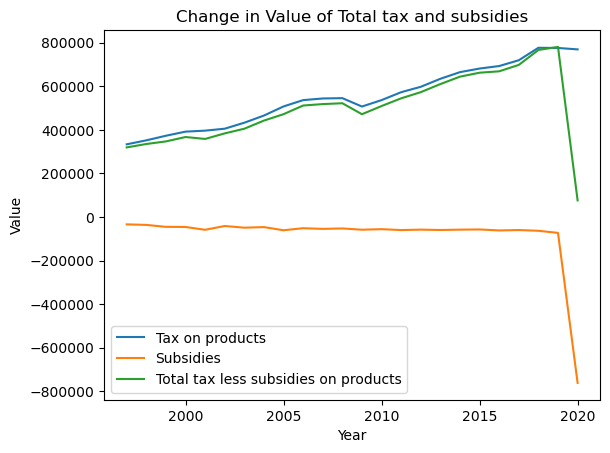

In [22]:
fig, ax = plt.subplots()
for subject in subjects:
    df_subject = df1[(df1['commodity'] == subject) & (df1['industry'] == 'Total industry supply')]
    ax.plot(df_subject['year'], df_subject['value'], label=subject)

ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Change in Value of Total tax and subsidies')

ax.legend()

plt.savefig('project2-1.png')
plt.show()
plt.close()

In [23]:
subjects_2 = ['Machinery','Computer and electronic products','Electrical equipment, appliances, and components','Motor vehicles, bodies and trailers, and parts']

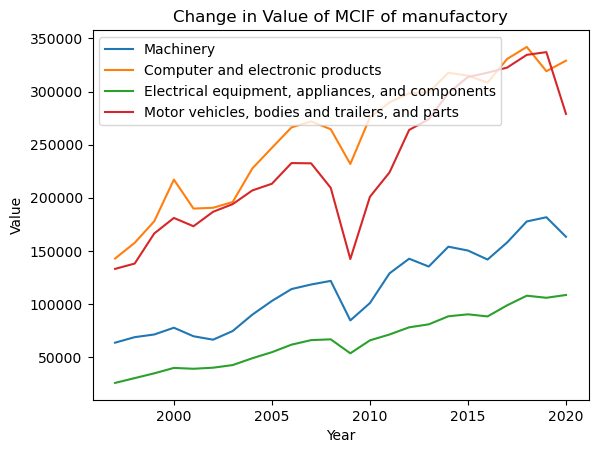

In [26]:
fig, ax = plt.subplots()
for subject in subjects_2:
    df_subject = df1[(df1['industry'] == subject) & (df1['commodity'] == 'Imports')]
    ax.plot(df_subject['year'], df_subject['value'], label=subject)

ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Change in Value of MCIF of manufactory')

ax.legend()

plt.savefig('project2-3.png')
plt.show()
plt.close()

In [50]:
df_filtered = df1[df1['industry'].isin(['Housing', 'Social assistance']) & (df1['commodity'] == 'Total product supply (purchaser prices)')]

In [51]:
df_pivot = df_filtered.pivot(index='year', columns='industry', values='value')
df_pivot['Housing'] = df_pivot['Housing'].astype(float)
df_pivot['Social assistance'] = df_pivot['Social assistance'].astype(float)

In [54]:
def peoblem_02(dimension1, dimension2):
    df_filtered = df1[df1['industry'].isin([dimension1, dimension2]) & (df1['commodity'] == 'Total product supply (purchaser prices)')]

    df_pivot = df_filtered.pivot(index='year', columns='industry', values='value')
    df_pivot[dimension1] = df_pivot[dimension1].astype(float)
    df_pivot[dimension2] = df_pivot[dimension2].astype(float)

    sns.lmplot(x=dimension1, y=dimension2, data=df_pivot)

    plt.title(f'Scatter plot of Value of {dimension1} vs {dimension2} with Regression Line')
    plt.savefig('project2-2.png')
    plt.show()
    plt.close() 

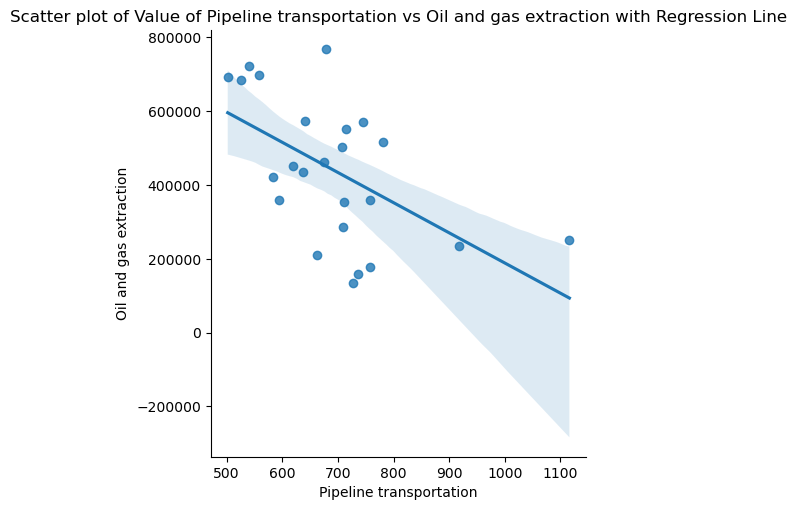

In [58]:
peoblem_02('Pipeline transportation', 'Oil and gas extraction')